In [1]:
#librerias

import random as r
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Punto 1

In [2]:
#baraja española
spanish_deck_48 = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

#baraja espanola modificada
spanish_deck_40_1 = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]

#baraja poker
poker_deck_52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

#baraja poker modificada
poker_deck_52_1 = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

n = 10000000


#calcular la probabilidad de hacer 21 en n intentos con la baraja "cartas", si prnt es verdadero, imprime el resultado con el nombre "name". De lo contrario retorna la probabilidad
def prob_21(cartas, n, name, prnt):
    prb = 0

    for i in range(n):
        sum = 0 
        brj  = cartas.copy()
        while sum < 21:
            num = r.choice(brj)
            sum += num
            brj.remove(num)

        prb += 1 if sum == 21 else 0
        
    if prnt: 
      print(name, ":", prb, "de", n, "=", prb / n)
    else:
      return prb / n


prob_21(spanish_deck_48, n,   "spanish_deck_48  ", True)
prob_21(poker_deck_52, n,     "poker_deck_52    ", True)

spanish_deck_48   : 1576969 de 10000000 = 0.1576969
poker_deck_52     : 1447101 de 10000000 = 0.1447101


# Punto 2

In [3]:
#calcular la probabilidad de hacer 21 en n intentos con la baraja "cartas", y las cartas "act", en la mano
def prob_21_s(cartas, n, act):
    prb = 0

    n_cartas = []

    for i in range(n):
        sum = 0 if len(act) == 0 else np.sum(act)
        nums = []
        brj  = cartas.copy()
        while sum < 21:
            num = brj[r.randint(0, len(brj) - 1)]
            sum += num
            nums.append(num)
            brj.remove(num)

        if sum == 21:
            prb += 1
            n_cartas.append(len(nums) + len(act))
        
    return [prb, n_cartas]

prb_21_spanish_48 = prob_21_s(spanish_deck_48, n, [])
prb_21_spanish_40_1 = prob_21_s(spanish_deck_40_1, n, [])
prb_21_poker = prob_21_s(poker_deck_52, n, [])
prb_21_poker_1 = prob_21_s(poker_deck_52_1, n, [])

prob_21(spanish_deck_40_1, n, "spanish_deck_40_1", True)
prob_21(poker_deck_52_1, n,   "poker_deck_52_1  ", True)

spanish_deck_40_1 : 1496303 de 10000000 = 0.1496303
poker_deck_52_1   : 1401519 de 10000000 = 0.1401519


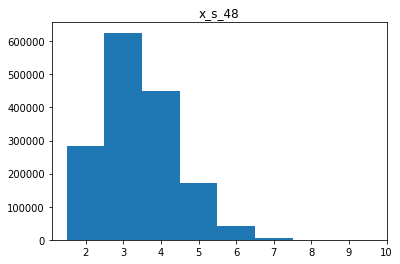

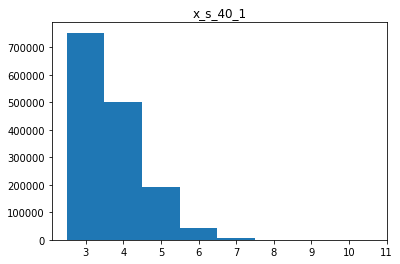

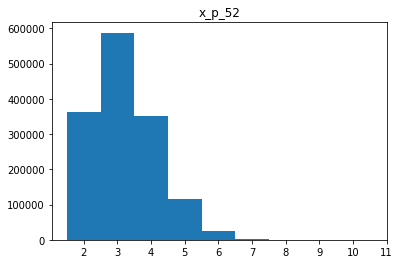

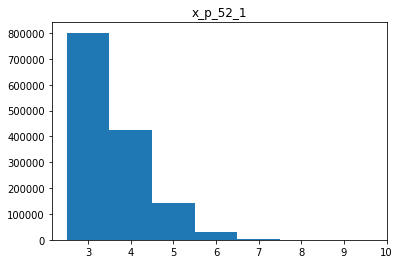

In [4]:
#crea un histograma con la distribucion "distrb" y el nombre "name"
def hist(distrb, name) :
    bins = np.arange(distrb.min(), distrb.max() + 1.5) - 0.5

    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.hist(distrb, bins = bins)
    ax.set_xticks(bins + 0.5)
    ax.set_title(name)

x_s_48 = np.asarray(prb_21_spanish_48[1])
x_s_40_1 = np.asarray(prb_21_spanish_40_1[1])
x_p_52 = np.asarray(prb_21_poker[1])
x_p_52_1 = np.asarray(prb_21_poker_1[1])

#histograma baraja española
hist(x_s_48, 'x_s_48')

#histograma baraja española modificada
hist(x_s_40_1, 'x_s_40_1')

#histograma baraja poker
hist(x_p_52, 'x_p_52')

#histograma baraja poker modificada
hist(x_p_52_1, 'x_p_52_1')

# Punto 3

In [18]:
#histograma baraja española 48 modificada, sin [7,7,5]
spanish_deck_48_m   = [1,2,3,4,5,6,8,9,10,11,12,1,2,3,4,5,6,8,9,10,11,12,1,2,3,4,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]
#histograma baraja española 48 modificada, tres 10s, sin [7,7,5]
spanish_deck_48_m_1 = [1,2,3,4,5,6,8,9,10,10,10,1,2,3,4,6,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]
#histograma baraja poker modificada, sin [7,7,5]
poker_deck_52_m     = [1,2,3,4,5,6,8,9,10,11,12,13,1,2,3,4,6,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]
#histograma baraja poker modificada, cuatro 10s, sin [7,7,5]
poker_deck_52_m_1   = [1,2,3,4,5,6,8,9,10,10,10,10,1,2,3,4,6,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

#elije aleatoreamente la mitad de un baraja completa "deck", sin la posibilidad de sacar las cartas en la mano "act"
def half_deck(deck, act):
    x = (len(deck) + len(act)) // 2
    h_deck = []

    for k in range(x):
        h_deck.append(deck[r.randint(0, len(deck) - 1)])

    return h_deck

current = [7,7,5]

#calcula el deck n/2
half_deck_spanish_48_m   = half_deck(spanish_deck_48_m,   [7,7,5])
half_deck_spanish_48_m_1 = half_deck(spanish_deck_48_m_1, [7,7,5])
half_deck_poker_52_m     = half_deck(poker_deck_52_m,     [7,7,5])
half_deck_poker_52_m_1   = half_deck(poker_deck_52_m_1,   [7,7,5])

#calcula las probabilidades con la mitad de la baraja y las cartas en la mano
prb_21_spanish_48_m   = prob_21_s(half_deck_spanish_48_m,   n, current)
prb_21_spanish_48_m_1 = prob_21_s(half_deck_spanish_48_m_1, n, current)
prb_21_poker_52_m     = prob_21_s(half_deck_poker_52_m,     n, current)
prb_21_poker_52_m_1   = prob_21_s(half_deck_poker_52_m_1,   n, current)

print("half deck:", half_deck_spanish_48_m,   "prob :", prb_21_spanish_48_m[0],   "de", n, "=", prb_21_spanish_48_m[0]  / n)
print("half deck:", half_deck_spanish_48_m_1, "prob :", prb_21_spanish_48_m_1[0], "de", n, "=", prb_21_spanish_48_m_1[0] / n)
print("half deck:", half_deck_poker_52_m,     "prob :", prb_21_poker_52_m[0],     "de", n, "=", prb_21_poker_52_m[0]    / n)
print("half deck:", half_deck_poker_52_m_1,   "prob :", prb_21_poker_52_m_1[0],    "de", n, "=", prb_21_poker_52_m_1[0]  / n)

half deck: [9, 8, 2, 9, 12, 8, 3, 3, 10, 8, 4, 1, 7, 1, 2, 4, 1, 6, 11, 2, 10, 11, 1, 11] prob : 1489 de 10000 = 0.1489
half deck: [10, 10, 2, 9, 5, 7, 10, 7, 7, 1, 10, 1, 9, 10, 7, 10, 4, 4, 2, 8, 8, 3, 10, 3] prob : 852 de 10000 = 0.0852
half deck: [6, 11, 6, 12, 5, 3, 8, 13, 7, 5, 3, 2, 7, 1, 2, 12, 2, 6, 9, 7, 12, 3, 6, 1, 8, 2] prob : 1520 de 10000 = 0.152
half deck: [8, 3, 9, 10, 7, 9, 10, 6, 10, 5, 9, 4, 4, 9, 6, 1, 6, 10, 10, 8, 9, 10, 6, 2, 1, 10] prob : 382 de 10000 = 0.0382


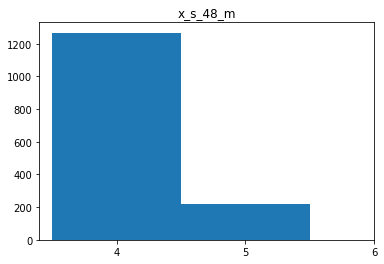

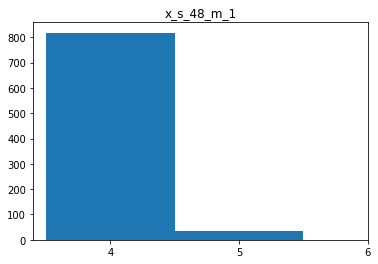

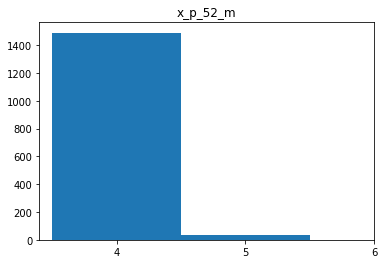

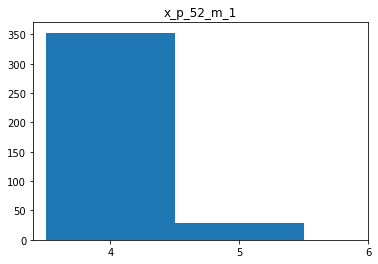

In [30]:
x_s_48_m   = np.asarray(prb_21_spanish_48_m[1])
x_s_48_m_1 = np.asarray(prb_21_spanish_48_m_1[1])
x_p_52_m   = np.asarray(prb_21_poker_52_m[1])
x_p_52_m_1 = np.asarray(prb_21_poker_52_m_1[1])

#histograma media baraja española modificada
hist(x_s_48_m, 'x_s_48_m')

#histograma media baraja española modificada 10s
hist(x_s_48_m_1, 'x_s_48_m_1')

#histograma media baraja poker modificada
hist(x_p_52_m, 'x_p_52_m')

#histograma media baraja poker modificada 10s
hist(x_p_52_m_1, 'x_p_52_m_1')

#Punto 4


A hotdeck has 4 ones and 4 twos.

Then:
*   4/8 * 3/7 probability to get a one.
*   4/8 probability to get a two. 

The probability to get 21 is 4/8 * 3/7 + 4/8.

In [22]:
print("analytic prob:", 4/8 * 3/7 + 4/8)

analytic prob: 0.7142857142857143


The probability to get 21 with a cold deck is 0

In [9]:
#cartas en la mano
current = [7,7,5]

#mejor baraja posible de 8 cartas
hotdeck = [1,2,1,2,1,2,1,2]

#la peor baraja, es cualquier baraja que no contenga 1 o 2
coldeck = list(np.random.randint(3, max(poker_deck_52) + 1, size = 8))

prb_hd = prob_21_s(hotdeck, n, current)
prb_cd = prob_21_s(coldeck, n, current)

print("hotdeck probability:", prb_hd[0] / n)
print("colddeck probability:", prb_cd[0] / n)

hotdeck probability: 0.7143121
colddeck probability: 0.0


Text(0.5, 1.0, 'coldeck')

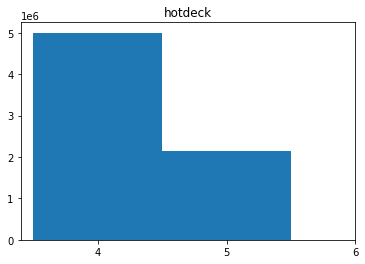

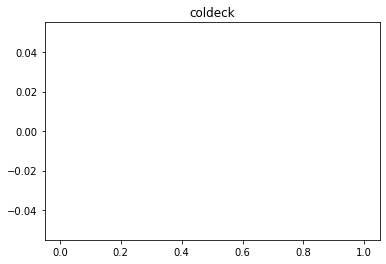

In [26]:
hd = np.asarray(prb_hd[1])
cd = np.asarray(prb_cd[1])

#histograma mejor baraja
hist(hd, 'hotdeck')

#histograma peor baraja
f1 = plt.figure()

ax1 = f1.add_subplot(111)
ax1.hist(cd)
ax1.set_title('coldeck')

#Punto 5

In [11]:
#baraja española
spanish_deck_48 = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

#baraja espanola modificada
spanish_deck_40_1 = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]

#baraja poker
poker_deck_52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

#baraja poker modificada
poker_deck_52_1 = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

#simula n veces el fin de semana de ben en el casino, con una hotdeck, coldeck, mano actual para la hotdeck "act_hotdeck", 
#mano actual para la coldeck "act_coldeck" y una probabilidad de que haya una hotdeck
def ben_sim(n, games, hotdeck, act_hotdeck, coldeck, act_coldeck, prb_hotdeck):
  n_cartas = []
  cash = 0

  for x in range(n):
    prb = 0
    j = 0

    for i in range(games):
      p = r.random()

      act = []
      brj = []
      bet = 10

      if p < prb_hotdeck:
        act = act_hotdeck.copy()
        brj = hotdeck.copy()
        bet = 1000

      else:
        act = act_coldeck.copy()
        brj = coldeck.copy()
        bet = 10

      sum = 0 if len(act) == 0 else np.sum(act)
      nums = []

      while sum < 21:
        num = brj[r.randint(0, len(brj) - 1)]
        sum += num
        nums.append(num)
        brj.remove(num)
        j += 1

      if sum == 21:
        prb += 1
        n_cartas.append(len(nums) + len(act))
        cash += bet
      else:
        cash -= bet

  return [cash / n, n_cartas]
  
#mano para la hotdeck y probabilidad de una hotdeck
act_hot = [7,7,5]
hotdeck_prob = 1/10

#cantidad de simulaciones
n = 10000

#candidad de juegos, durante le fin de semana
days = 3
hours = 10
game_time = 3

games_hour = 60 // game_time
total_games = (hours * games_hour) * 3

#simular el fin de semana de ben con las 4 barajas
cash_ben_s   = ben_sim(n, total_games, hotdeck, act_hot, spanish_deck_48,   [], hotdeck_prob)
cash_ben_s_m = ben_sim(n, total_games, hotdeck, act_hot, spanish_deck_40_1, [], hotdeck_prob)
cash_ben_p   = ben_sim(n, total_games, hotdeck, act_hot, poker_deck_52,     [], hotdeck_prob)
cash_ben_p_m = ben_sim(n, total_games, hotdeck, act_hot, poker_deck_52_1,   [], hotdeck_prob)

#imprimir los resultados
print("ben cash sapnish deck    : $", cash_ben_s[0],   "Total games:", total_games * n)
print("ben cash sapnish mod deck: $", cash_ben_s_m[0], "Total games:", total_games * n)
print("ben cash poker deck      : $", cash_ben_p[0],   "Total games:", total_games * n)
print("ben cash poker mod deck  : $", cash_ben_p_m[0], "Total games:", total_games * n)

ben cash sapnish deck    : $ 21918.746 Total games: 6000000
ben cash sapnish mod deck: $ 21945.694 Total games: 6000000
ben cash poker deck      : $ 21793.631 Total games: 6000000
ben cash poker mod deck  : $ 21883.787 Total games: 6000000


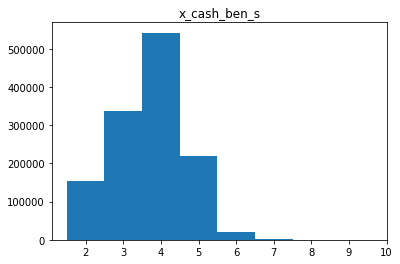

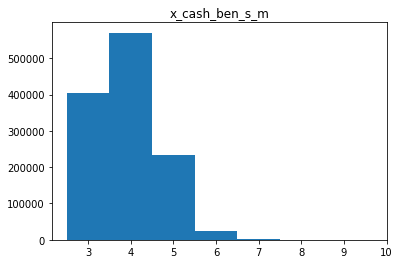

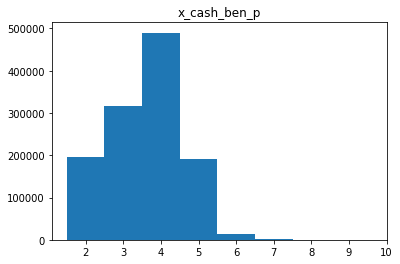

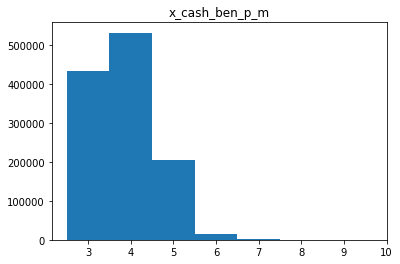

In [27]:
x_cash_ben_s = np.asarray(cash_ben_s[1])
x_cash_ben_s_m = np.asarray(cash_ben_s_m[1])
x_cash_ben_p = np.asarray(cash_ben_p[1])
x_cash_ben_p_m = np.asarray(cash_ben_p_m[1])

#histograma simulacion Ben baraja española
hist(x_cash_ben_s, 'x_cash_ben_s')

#histograma simulacion Ben baraja española modificada
hist(x_cash_ben_s_m, 'x_cash_ben_s_m')

#histograma simulacion Ben baraja poker
hist(x_cash_ben_p, 'x_cash_ben_p')

#histograma simulacion Ben baraja poker modificada
hist(x_cash_ben_p_m, 'x_cash_ben_p_m')